# Introduction to HQS NMR Parameters

In the [previous tutorial](1_getting_started.ipynb) you have seen how to calculate a spectrum for a molecule whose NMR Parameters were defined in a `YAML` file. While this option allows you to use our tools for arbitrary molecules, we want to point out that one of the great features of **HQS Spectrum Tools** is its vast collection of NMR parameters stored in the `hqs-nmr-parameters` database. For each of the available molecules we will show you how to extract the associated spin Hamiltonian and how to calculate the corresponding spectrum. As NMR is also an interesting topic with respect to quantum computing, this will give you an ideal starting point to try out your own quantum algorithms and directly compare to a well-tested classical solver.

The `hqs_nmr_parameters` database is organized in [datasets](https://docs.cloud.quantumsimulations.de/hqs-spectrum-tools/subfolder/database/datasets.html). Here, we will start with the  [GISSMO](https://gissmo.bmrb.io/) dataset, which contains experimental <sup>1</sup>H NMR parameters for more than 1000 common organic molecules, and extract the spin Hamiltonian for one of the molecules in it. We can get the names of all of the included molecules as follows: 

In [1]:
from hqs_nmr_parameters.gissmo import molecules

molecules.get_names()

{'bmse000005': 'AMP',
 'bmse000006': 'ATP',
 'bmse000060': 'Adenine',
 'bmse000061': 'Adenosine',
 'bmse000063': 'Agmatine',
 'bmse000064': 'Alpha-ketoglutaric-acid',
 'bmse000067': 'Anthranilic-acid',
 'bmse000142': '(+-)-Acetylcarnitine',
 'bmse000143': '5-Acetylamido-2-chloroaniline',
 'bmse000146': 'ADA',
 'bmse000147': '4-Aminoantipyrine',
 'bmse000154': '4-2-Aminoethyl-morpholine',
 'bmse000168': 'Acetylcholine',
 'bmse000174': '5-Acetylamino-2-nitrobenzoic-acid',
 'bmse000178': 'Alpha-naphthoic-acid',
 'bmse000191': 'Acetic-acid',
 'bmse000286': 'Acetophenone',
 'bmse000305': '1-Amino-2-propanol',
 'bmse000307': '2-Amino-1-phenylethanol',
 'bmse000308': '2-Aminoethyl-dihydrogen-phosphate',
 'bmse000309': '2-Aminoethylphosphonic-acid',
 'bmse000310': '2-Aminophenol',
 'bmse000312': '6-Aminopenicillanic-acid',
 'bmse000365': 'Arbutin',
 'bmse000392': 'Acrylamide',
 'bmse000394': '6-Aminohexanoic-acid',
 'bmse000403': 'Ala-Ala',
 'bmse000424': 'Adipic-acid',
 'bmse000437': 'Allanto

As you can see we get a dictionary with the names of all molecules in the dataset and an associated key. We will for now just choose the first molecule (so AMP with the associated key 'bmse000005') and print some of the stored parameters:

In [2]:
molecular_data = molecules['bmse000005']

print("Name:", molecular_data.name)
print("Chemical formula:", molecular_data.formula)
print("Description:")
print(molecular_data.description)

Name: AMP
Chemical formula: C10H14N5O7P
Description:
NMR parameters for molecule 'AMP' from bmse000005 entry.
The data is available at: https://gissmo.bmrb.io/entry/bmse000005/simulation_1
Entry bmse000873 contains NMR parameters for the same molecule, but it was removed from the set based on data quality criteria.
NOTE: The entry for this molecule contains J-coupling data for 1H with the following isotopes: 31P



Having chosen a molecule, we can extract the associated spin Hamiltonian in `struqture` format using a simple convenience function:

In [3]:
from hqs_nmr_parameters import nmr_hamiltonian

field_T = 11.7
hamiltonian = nmr_hamiltonian(molecular_data, field=field_T)

print("Type:", type(hamiltonian))
print(hamiltonian)

Type: <class 'struqture_py.spins.PauliHamiltonian'>
PauliHamiltonian{
0Z: -6.341049e8,
1Z: -1.5650107834998076e9,
2Z: -1.5650107553297272e9,
3Z: -1.5650171440847883e9,
4Z: -1.5650178430314255e9,
5Z: -1.5650113103898551e9,
6Z: -1.5650115309459321e9,
7Z: -1.5650119497098224e9,
8Z: -1.5650139850920084e9,
0X1X: 7.154977268550754e0,
0Y1Y: 7.154977268550754e0,
0Z1Z: 7.154977268550754e0,
0X2X: 4.889888965312513e0,
0Y2Y: 4.889888965312513e0,
0Z2Z: 4.889888965312513e0,
1X2X: -1.854640008444898e1,
1Y2Y: -1.854640008444898e1,
1Z2Z: -1.854640008444898e1,
1X5X: 4.040788727678224e0,
1Y5Y: 4.040788727678224e0,
1Z5Z: 4.040788727678224e0,
2X5X: 8.265985802529517e0,
2Y5Y: 8.265985802529517e0,
2Z5Z: 8.265985802529517e0,
5X6X: 5.548528577526594e0,
5Y6Y: 5.548528577526594e0,
5Z6Z: 5.548528577526594e0,
6X7X: 8.461917511555951e0,
6Y7Y: 8.461917511555951e0,
6Z7Z: 8.461917511555951e0,
7X8X: 9.345360069282956e0,
7Y8Y: 9.345360069282956e0,
7Z8Z: 9.345360069282956e0,
}


Note that in this form, the Zeemann terms are extremely large. For actual calculations it is therefore often useful to switch to a rotating frame of reference, effectively subtracting the Lamor frequency of a reference isotope. To do so, simply hand over the relevant isotope. As here we are interested in proton NMR we can do so as follows: 

In [4]:
from hqs_nmr_parameters import Isotope

hamiltonian = nmr_hamiltonian(
    molecular_data,
    field=field_T,
    reference_isotope=Isotope(1, "H"),
)
print(hamiltonian)

PauliHamiltonian{
0Z: 9.308995488e8,
1Z: -6.33469980764389e3,
2Z: -6.306529727220535e3,
3Z: -1.2695284788370132e4,
4Z: -1.3394231425523758e4,
5Z: -6.861589855194092e3,
6Z: -7.082145932197571e3,
7Z: -7.500909822463989e3,
8Z: -9.536292008399963e3,
0X1X: 7.154977268550754e0,
0Y1Y: 7.154977268550754e0,
0Z1Z: 7.154977268550754e0,
0X2X: 4.889888965312513e0,
0Y2Y: 4.889888965312513e0,
0Z2Z: 4.889888965312513e0,
1X2X: -1.854640008444898e1,
1Y2Y: -1.854640008444898e1,
1Z2Z: -1.854640008444898e1,
1X5X: 4.040788727678224e0,
1Y5Y: 4.040788727678224e0,
1Z5Z: 4.040788727678224e0,
2X5X: 8.265985802529517e0,
2Y5Y: 8.265985802529517e0,
2Z5Z: 8.265985802529517e0,
5X6X: 5.548528577526594e0,
5Y6Y: 5.548528577526594e0,
5Z6Z: 5.548528577526594e0,
6X7X: 8.461917511555951e0,
6Y7Y: 8.461917511555951e0,
6Z7Z: 8.461917511555951e0,
7X8X: 9.345360069282956e0,
7Y8Y: 9.345360069282956e0,
7Z8Z: 9.345360069282956e0,
}


Now that we know how to obtain the spin Hamiltonian, let us see how to calculate the NMR spectrum for this molecule. As the Hamiltonian is already in `struqture` format we could interface directly with the solver backend as discussed in [tutorial 7](./7_spectrum_from_struqture_hamiltonian.ipynb). However, since we also have the molecular parameters, we can instead simply use the `calculate_spectrum` method introduced in [tutorial 1](1_getting_started.ipynb):

In [5]:
# NMR
from hqs_nmr.calculate import calculate_spectrum
from hqs_nmr.datatypes import NMRCalculationParameters
from hqs_nmr.visualization import plot_spectrum

# Can be installed via HQStage and gives the plots a nice layout. This is an optional dependency.
import HQStyle
HQStyle.import_all()

Now we can simply hand over the molecular parameters extracted from the `hqs-nmr-parameters` database above, together with the `NMRCalculationParameters` defining the field strength at which we want to perform the calculation and plot the result:

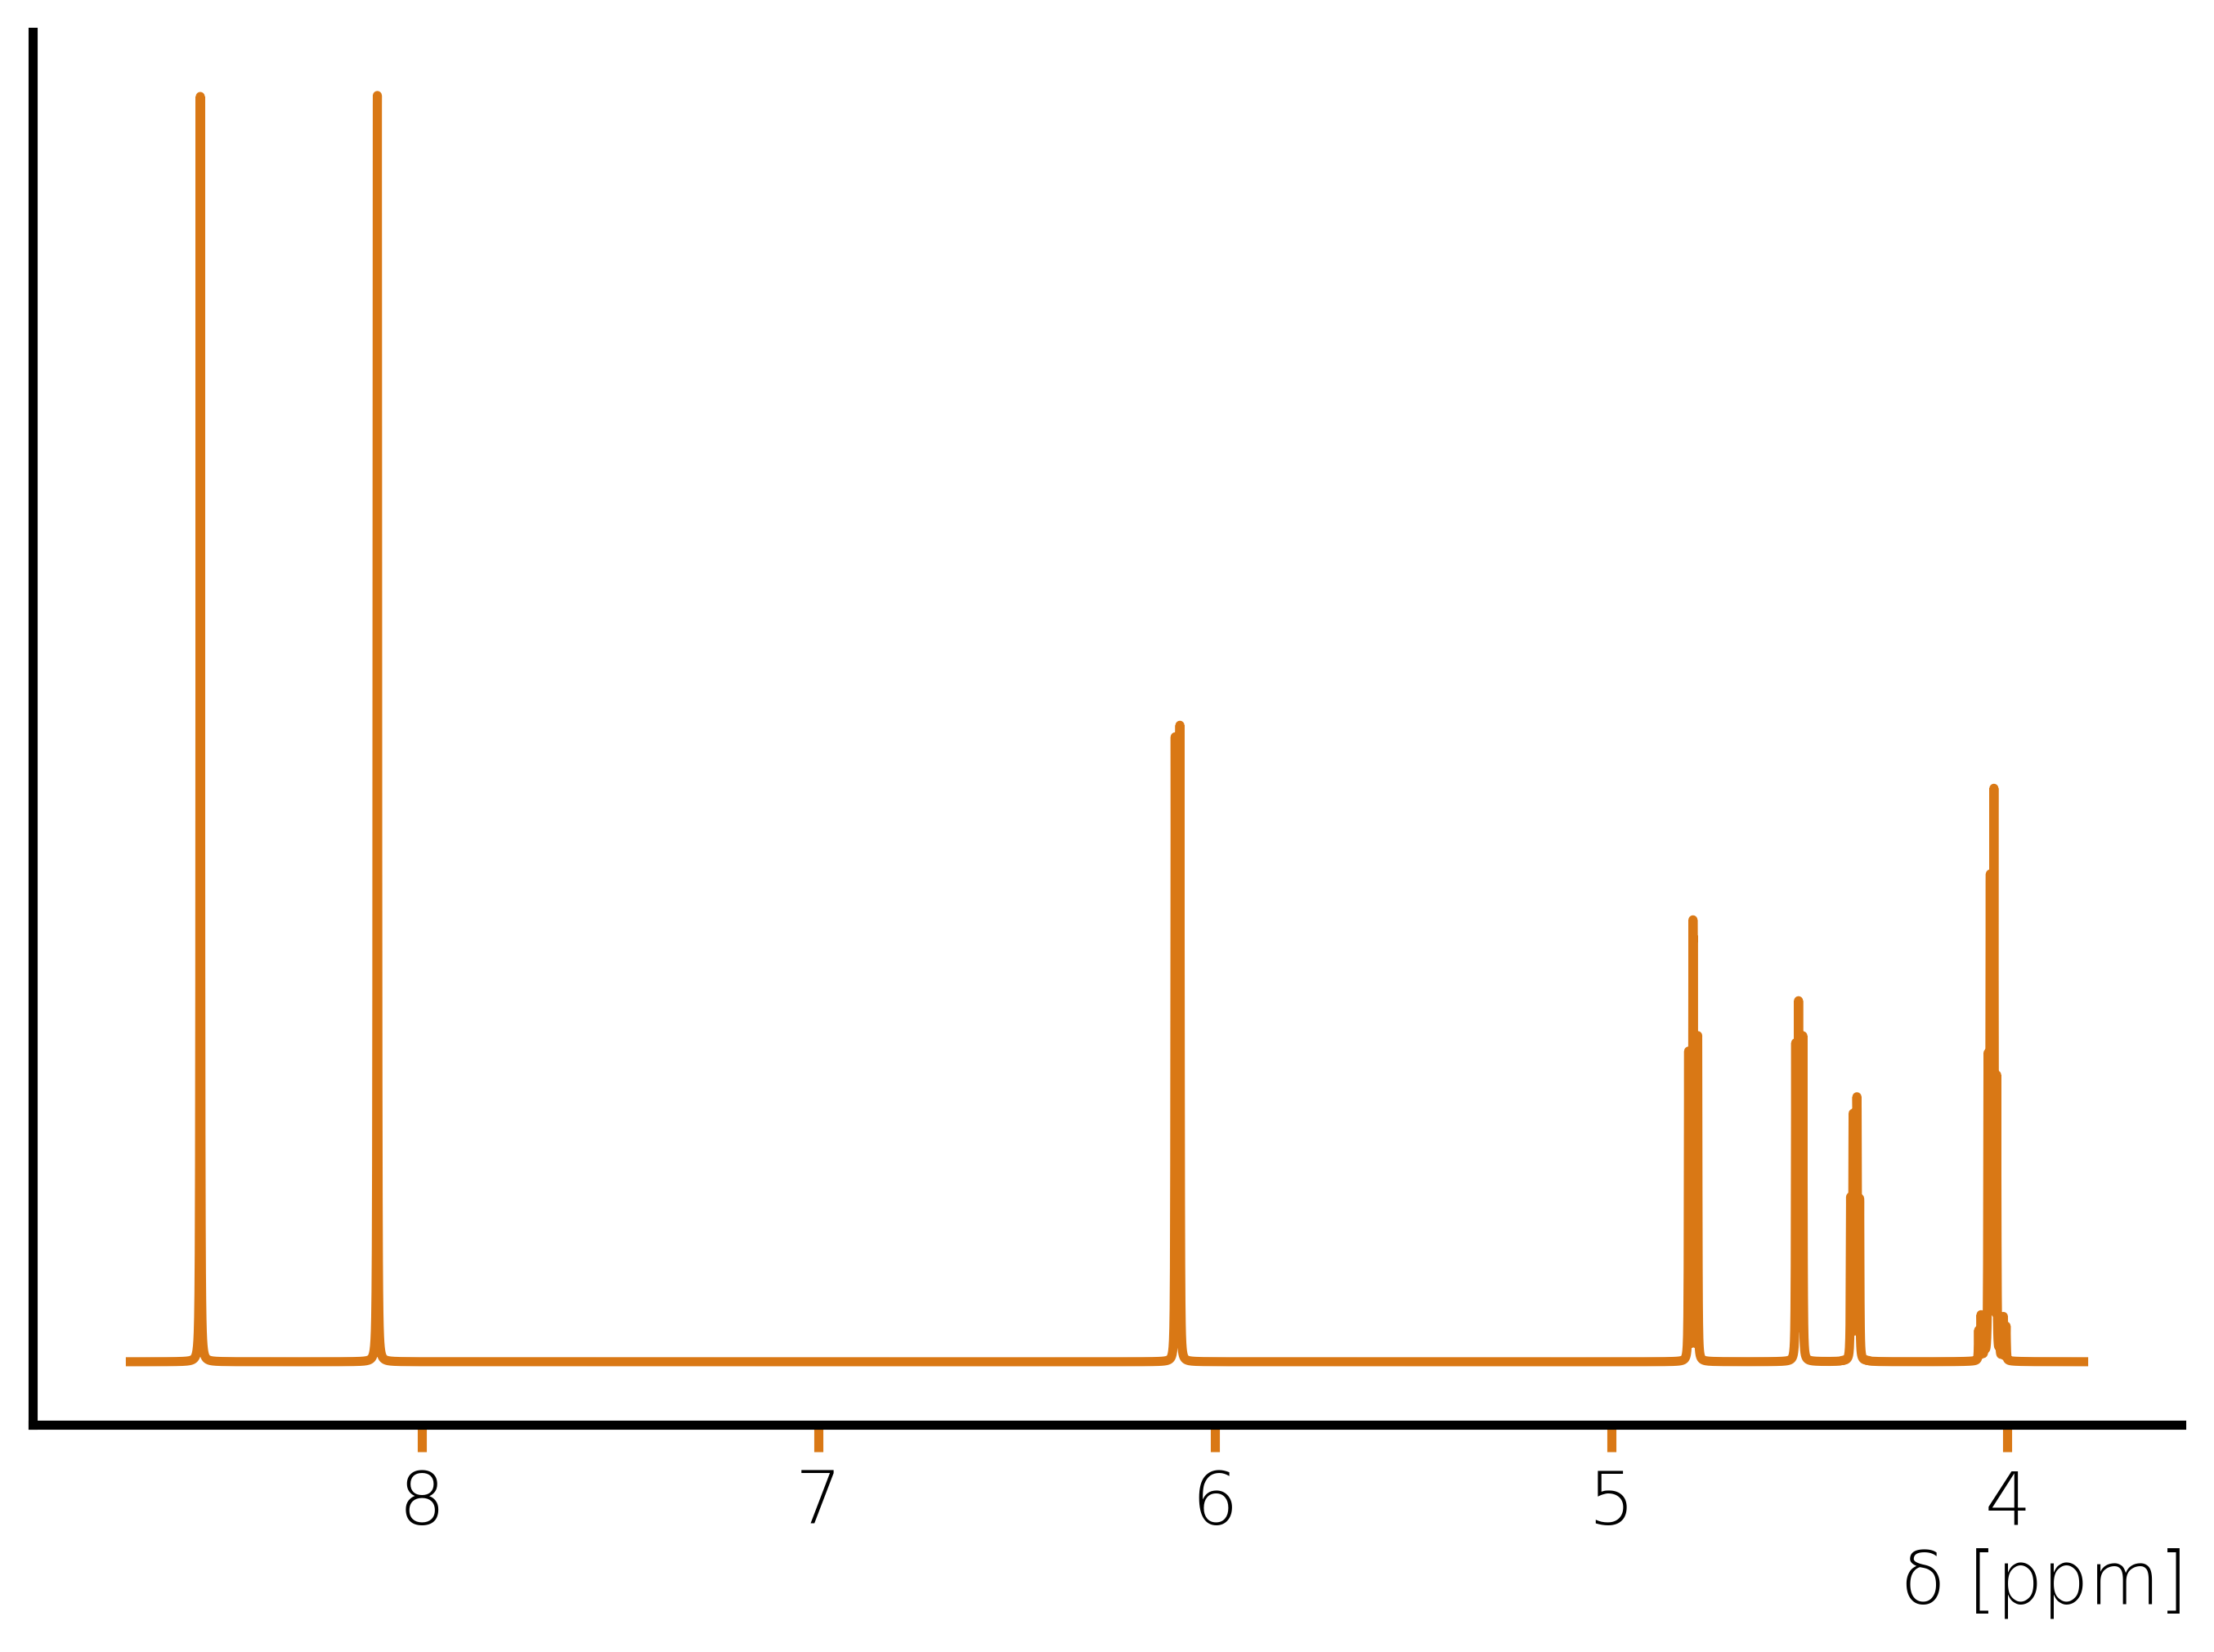

In [6]:
calculation_parameters = NMRCalculationParameters(field_T=field_T)
result_spectrum = calculate_spectrum(molecular_data, calculation_parameters)
plot_spectrum(result_spectrum)

Note that for this molecule the provided link in the molecule description points to the origin of the data. There, you can also find the associated experimental data, in case you want to convince yourself that the result is indeed correct.

If you want to test the functionality discussed in this notebook feel free to choose any other
molecule in the database. For this, remember that `hqs-nmr-parameters` is organized in datasets.
The available datasets are:

- **cheshire**: Molecules from the [CHESHIRE](http://cheshirenmr.info/) database, including both, experimental and calculated NMR parameters.
- **examples**: A rather diverse set of small molecules from different origins that can be used easily and quickly for testing.
- **gissmo**: Molecules from the [GISSMO](https://gissmo.bmrb.io/) database, including only experimental NMR Parameters.
- **pytholab**: Some selected molecules from a catalogue by [Phytolab](https://www.phytolab.com/).
- **assignments**: Examples for special NMR shift assignment problems.

We will not go into the details of the individual datasets here, however you can find more information on each of them in the [documentation](https://docs.cloud.quantumsimulations.de/hqs-spectrum-tools/subfolder/database/datasets.html) or [tutorial 4](4_hqs_nmr_parameters_in_detail.ipynb). If you just want to browse through all the molecules, it might be convenient to use the **merged** datasets, which are combinations of the datasets mentioned above. They can be imported from the top level of the module:

In [7]:
from hqs_nmr_parameters import molecules

molecules.get_names()

{'examples/limonene_DFT': 'Limonene',
 'examples/endo-dicyclopentadiene_DFT': 'endo-Dicyclopentadiene',
 'examples/Artemisinin_exp': 'Artemisinin',
 'examples/cis-3-chloroacrylic_acid_exp': 'cis-3-Chloroacrylic acid',
 'examples/C10H7Br': '2-Bromonaphthalene',
 'examples/cyclopentadiene_DFT': 'Cyclopentadiene',
 'examples/C3H8': 'Propane',
 'examples/1,2,4-trichlorobenzene': '1,2,4-Trichlorobenzene',
 'examples/CH3Cl': 'Chloromethane',
 'examples/C10H8': 'Naphthalene',
 'examples/Androstenedione': 'Androstenedione',
 'examples/C6H6': 'Benzene',
 'examples/CHCl3': 'Chloroform',
 'examples/C2H3CN': 'Acrylonitrile',
 'examples/C2H5Cl': 'Chloroethane',
 'examples/1,2-di-tert-butyl-diphosphane': 'tert-Butyl(tert-butylphosphanyl)phosphane',
 'examples/C6H5NO2': 'Nitrobenzene',
 'examples/C2H5OH': 'Ethanol',
 'examples/Cinnamaldehyde': 'Cinnamaldehyde',
 'examples/C2H6': 'Ethane',
 'examples/Triphenylphosphine_oxide': 'Triphenylphosphine oxide',
 'examples/exo-dicyclopentadiene_DFT': 'exo-Dic

As you can see, the keys now also reference the dataset the molecular data is from.

Finally, we want to point out that this tutorial was only supposed to serve as a quick introduction to the `hqs-nmr-parameters` database. For a more detailed look at it check out [tutorial 4](4_hqs_nmr_parameters_in_detail.ipynb).